In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bitcoins = pd.read_csv('../Data/Cours_BTC2FEUR_-_Feuille_1.csv')

NUMBER_DECIMAL = 2

In [147]:
bitcoins['Prix'] = bitcoins['Prix'].str.replace('1 BTC = ', '')
bitcoins['Prix'] = bitcoins['Prix'].str.replace('€', '')

In [148]:
# print( bitcoins.head() )
bitcoins['Prix'] = bitcoins['Prix'].astype(float).round(NUMBER_DECIMAL)
bitcoins['Prix'].sum().round(NUMBER_DECIMAL)

2492385.11

In [149]:
bitcoins['Date'] = pd.to_datetime(bitcoins['Date'])
bitcoins = bitcoins.rename(columns={ 'Date' : 'date',  'Prix' : 'price', 'Variation 24h' : 'variation-24h' } )
bitcoins.head()

,date,price,variation-24h
0,2013-01-28,13.05,0%
1,2013-01-29,13.20,1.14%
2,2013-01-30,13.79,4.28%
3,2013-01-31,14.56,5.29%
4,2013-02-01,14.75,1.29%


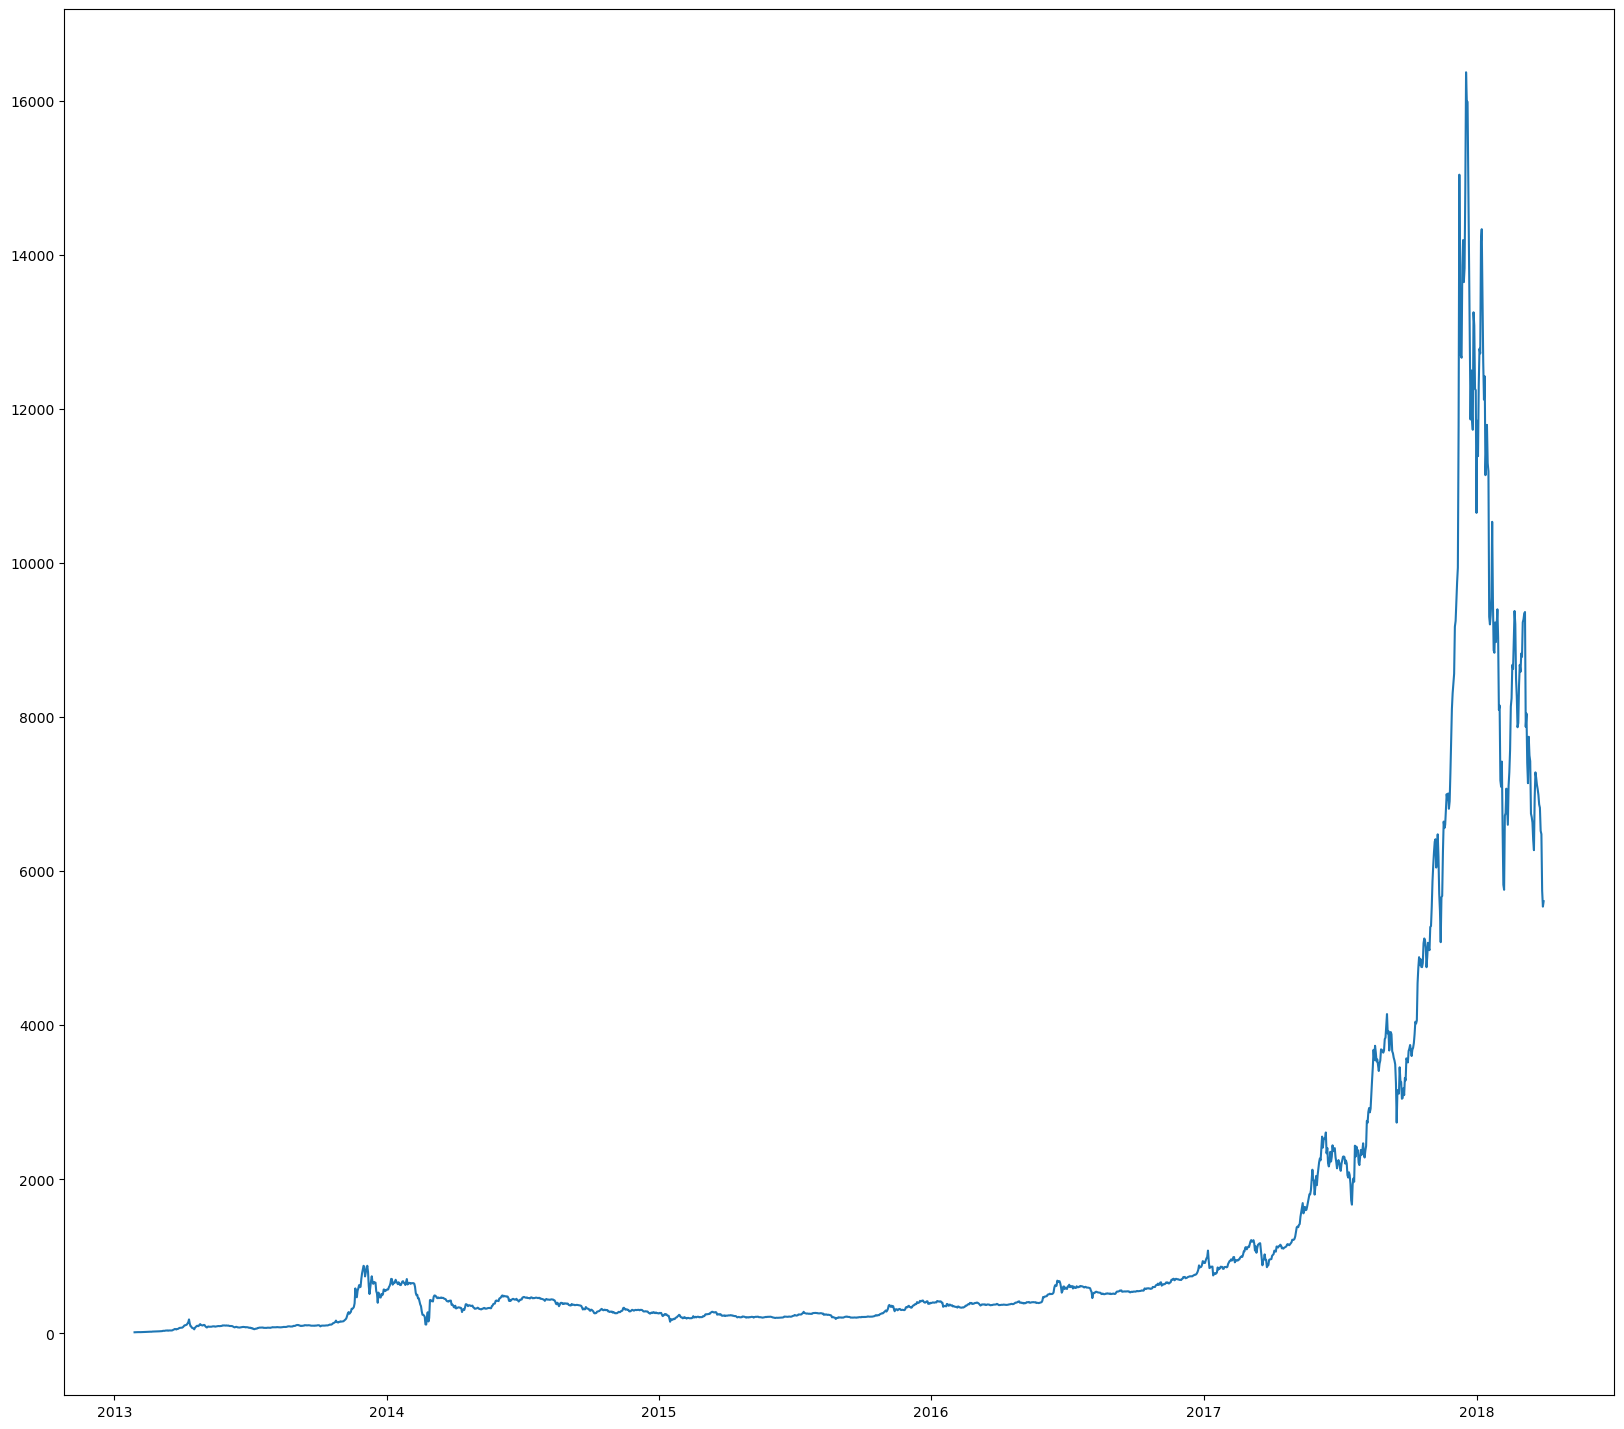

In [156]:
plt.figure(figsize=(20, 18))
plt.plot(bitcoins['date'], bitcoins['price'])
plt.show();

In [158]:
bitcoins['avg_cum'] = bitcoins['price'].expanding().mean().round(NUMBER_DECIMAL)

In [159]:
bitcoins.head(10)

,date,price,variation-24h,avg_cum
0,2013-01-28,13.05,0%,13.05
1,2013-01-29,13.20,1.14%,13.12
2,2013-01-30,13.79,4.28%,13.35
3,2013-01-31,14.56,5.29%,13.65
4,2013-02-01,14.75,1.29%,13.87
5,2013-02-02,15.35,3.91%,14.12
6,2013-02-03,15.10,-1.66%,14.26
7,2013-02-04,14.37,-5.08%,14.27
8,2013-02-05,14.76,2.64%,14.33
9,2013-02-06,15.02,1.73%,14.40


In [160]:
bitcoins['avg_rolling'] = bitcoins['price'].rolling(window=7).mean().round(NUMBER_DECIMAL)

In [161]:
bitcoins.head(10)

,date,price,variation-24h,avg_cum,avg_rolling
0,2013-01-28,13.05,0%,13.05,NaN
1,2013-01-29,13.20,1.14%,13.12,NaN
2,2013-01-30,13.79,4.28%,13.35,NaN
3,2013-01-31,14.56,5.29%,13.65,NaN
4,2013-02-01,14.75,1.29%,13.87,NaN
5,2013-02-02,15.35,3.91%,14.12,NaN
6,2013-02-03,15.10,-1.66%,14.26,14.26
7,2013-02-04,14.37,-5.08%,14.27,14.45
8,2013-02-05,14.76,2.64%,14.33,14.67
9,2013-02-06,15.02,1.73%,14.40,14.84


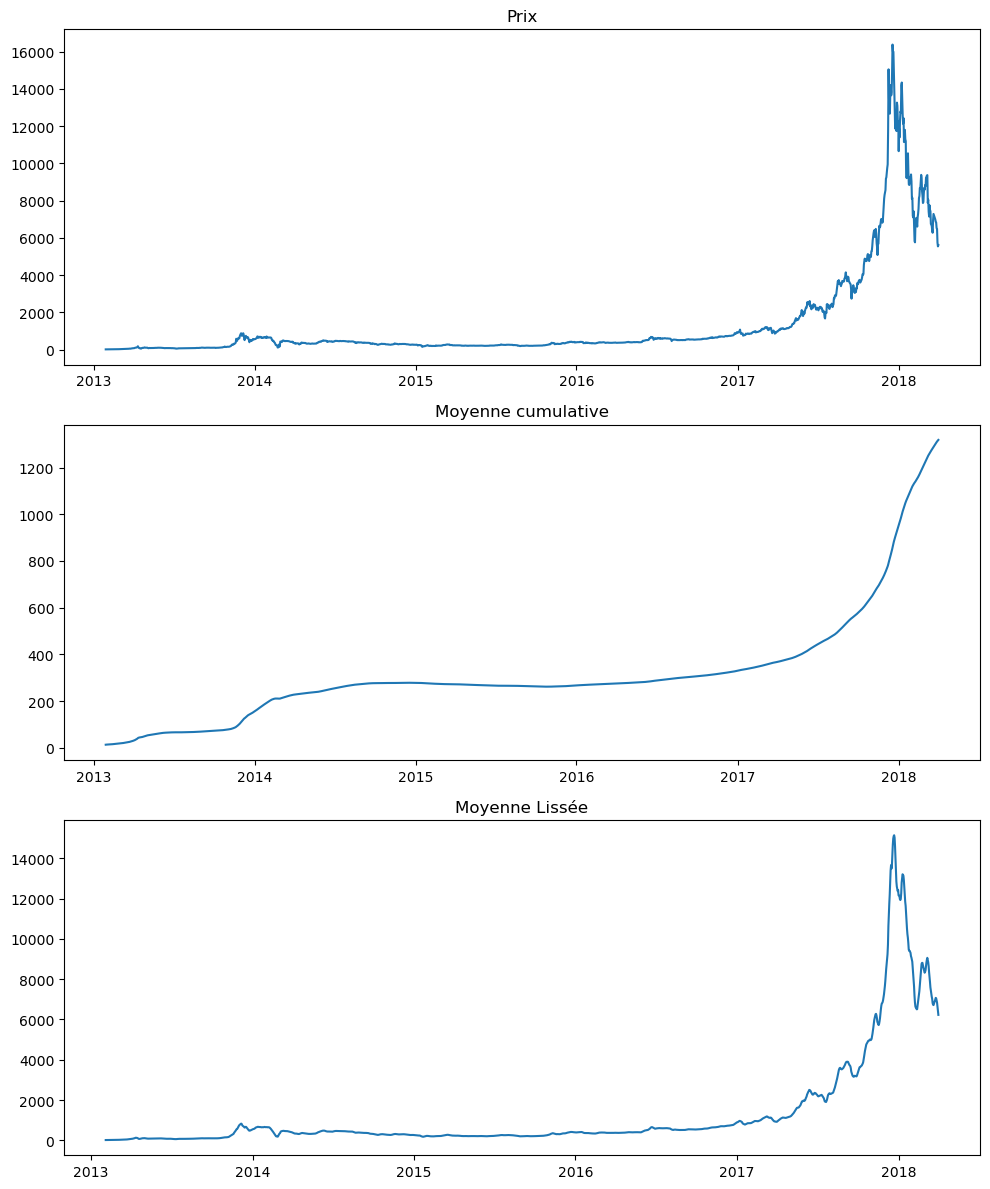

In [162]:
# Exemple de mise en page correcte avec plt.subplot()
plt.figure(figsize=(10, 12))

# Premier subplot
plt.subplot(3, 1, 1)
plt.title("Prix")
plt.plot(bitcoins['date'], bitcoins['price'])

# Deuxième subplot
plt.subplot(3, 1, 2)
plt.title("Moyenne cumulative")
plt.plot(bitcoins['date'], bitcoins['avg_cum'])

# Troisième subplot
plt.subplot(3, 1, 3)
plt.title("Moyenne Lissée")
plt.plot(bitcoins['date'], bitcoins['avg_rolling'])

# Ajustements pour espacer les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()

In [163]:
bitcoins.describe()

,date,price,avg_cum,avg_rolling
count,1890,1890.000000,1890.000000,1884.000000
mean,2015-08-30 11:59:59.999999744,1318.722280,318.238788,1313.521847
min,2013-01-28 00:00:00,13.050000,13.050000,14.260000
25%,2014-05-15 06:00:00,223.680000,237.555000,223.687500
50%,2015-08-30 12:00:00,391.415000,272.800000,389.875000
75%,2016-12-14 18:00:00,768.952500,324.107500,759.205000
max,2018-04-01 00:00:00,16376.300000,1318.720000,15146.780000
std,NaN,2547.864754,242.272227,2536.229239


In [164]:
sliceBitcoins = bitcoins[(bitcoins['date'] >= '2013-01-28') & (bitcoins['date'] <= '2017-01-28')]

In [165]:
sliceBitcoins.tail()

,date,price,variation-24h,avg_cum,avg_rolling
1457,2017-01-24,862.01,-0.3%,338.55,840.57
1458,2017-01-25,862.57,0.06%,338.91,851.00
1459,2017-01-26,838.05,-2.93%,339.25,848.56
1460,2017-01-27,836.72,-0.16%,339.59,849.81
1461,2017-01-28,859.85,2.69%,339.95,852.13


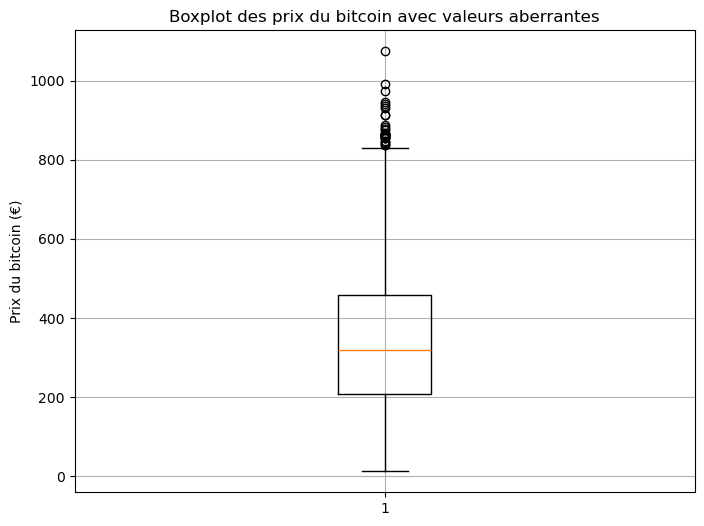

In [170]:
# Création du boxplot avec gestion des valeurs aberrantes
plt.figure(figsize=(8, 6))
plt.boxplot(sliceBitcoins['price'])

plt.title('Boxplot des prix du bitcoin avec valeurs aberrantes')
plt.ylabel('Prix du bitcoin (€)')
plt.grid(True)
plt.show()